In [1]:
# Dependencies
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import data frame for combusion engine cars
ice_df=pd.read_csv("Resources/Edmunds.csv")
ice_df

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
...,...,...,...,...,...,...,...,...,...,...
1691,Repairs,0,0,0,436,667,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1692,Taxes_Fees,2339,167,149,135,135,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1693,Financing,2851,2323,1743,1106,405,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1694,Depreciation,7273,1898,1796,2108,1997,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043


In [3]:
#removing expensive cars from analysis to match most expensive ev
ev_max_cost=112924
ev_min_cost=30119
ice_df=ice_df.loc[ice_df["cost"]>ev_min_cost-1,:]
ice_df=ice_df.loc[ice_df["cost"]<ev_max_cost+1,:]
ice_df

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
...,...,...,...,...,...,...,...,...,...,...
1691,Repairs,0,0,0,436,667,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1692,Taxes_Fees,2339,167,149,135,135,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1693,Financing,2851,2323,1743,1106,405,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043
1694,Depreciation,7273,1898,1796,2108,1997,2023,FIAT 500X Sport 4dr SUV AWD,1.3L 4cyl Turbo 9A,36043


In [4]:
ice_df=ice_df.set_index(["info"])

Text(0, 0.5, 'Percentage of Deperation')

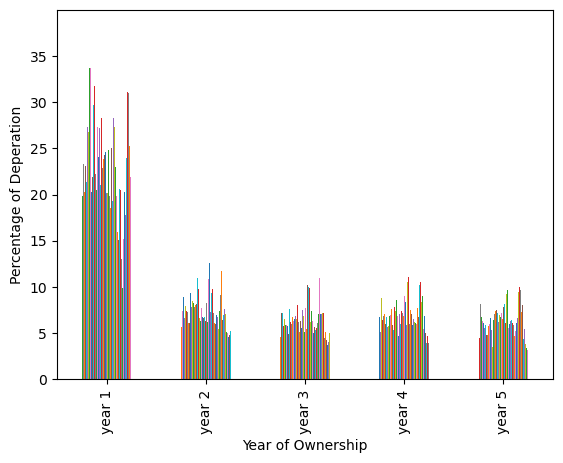

In [5]:
#ice_value_fraction=ice_df.loc[["Depreciation"],['year 1', 'year 2', 'year 3', 'year 4', 'year 5',"cost"]]
ice_value_fraction=ice_df.loc[["Depreciation"],['model','cost']]#pd.DataFrame(columns=['year 1'])
for i in range(5):
    text='year '+str(i+1)
    ice_value_fraction[text] = ice_df.loc[["Depreciation"],[text]]
    ice_value_fraction[text] = ice_value_fraction[text]/ice_value_fraction["cost"]*100
ice_value_fraction=ice_value_fraction.T
#make models in row 1 header
ice_value_fraction.columns=ice_value_fraction.iloc[0]
#remove row 1
ice_value_fraction=ice_value_fraction.drop(["model",'cost'])
#ice_value_fraction
ice_value_fraction_plot=ice_value_fraction.plot(kind='bar',legend=False,align="center")
ice_value_fraction_plot.set_xlabel("Year of Ownership")
ice_value_fraction_plot.set_ylabel("Percentage of Deperation")

In [6]:
#add up yearly cost based on model and engine type
ice_yearly_cost_df=ice_df.groupby(["model","engine",'cost']).sum()
#fix summing of model year
ice_yearly_cost_df["model year"]=round(ice_yearly_cost_df["model year"]/7,0).astype(int)
ice_yearly_cost_df.head()

year 1  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   25212   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996   16606   
                                                   1.5L 4cyl Turbo CVT 37996   16469   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517   15978   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473   15270   

                                                                              year 2  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   12465   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8915   
                                                   1.5L 4cyl Turbo CVT 37996    8774   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8369   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8113   

                                                                              year 3  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   10953   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8028   
                                                   1.5L 4cyl Turbo CVT 37996    7883   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    7548   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    7348   

                                                                              year 4  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   13068   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8640   
                                                   1.5L 4cyl Turbo CVT 37996    8583   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8275   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8099   

                                                                              year 5  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   11562   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8712   
                                                   1.5L 4cyl Turbo CVT 37996    8558   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8314   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8082   

                                                                              model year  
model                                              engine              cost               
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096        2023  
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996        2023  
                                                   1.5L 4cyl Turbo CVT 37996        2023  
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517        2023  
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473        2023

Text(0, 0.5, '5 Year Cost ($)')

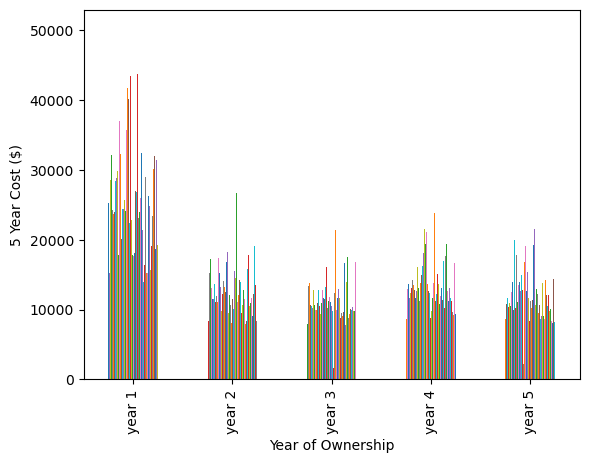

In [7]:
#fig,ax =plt.subplots()
#ax.bar(ice_yearly_cost_df[])
ice_transposed= ice_yearly_cost_df[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T
ice_transposed_plot=ice_transposed.plot(kind='bar',legend=False,align="center")#, figsize=(6,8))
ice_transposed_plot.set_xlabel("Year of Ownership")
ice_transposed_plot.set_ylabel("5 Year Cost ($)")

In [8]:
ice_yearly_cost_df['five_year_cost']=0
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_cost_df['five_year_cost']=ice_yearly_cost_df['five_year_cost']+ice_yearly_cost_df[text]
    

In [9]:
ice_yearly_cost_df.head()

year 1  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   25212   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996   16606   
                                                   1.5L 4cyl Turbo CVT 37996   16469   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517   15978   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473   15270   

                                                                              year 2  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   12465   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8915   
                                                   1.5L 4cyl Turbo CVT 37996    8774   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8369   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8113   

                                                                              year 3  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   10953   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8028   
                                                   1.5L 4cyl Turbo CVT 37996    7883   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    7548   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    7348   

                                                                              year 4  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   13068   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8640   
                                                   1.5L 4cyl Turbo CVT 37996    8583   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8275   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8099   

                                                                              year 5  \
model                                              engine              cost            
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096   11562   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996    8712   
                                                   1.5L 4cyl Turbo CVT 37996    8558   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517    8314   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473    8082   

                                                                              model year  \
model                                              engine              cost                
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096        2023   
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Turbo 6M  37996        2023   
                                                   1.5L 4cyl Turbo CVT 37996        2023   
Acura Integra 4dr Hatchback w/A-SpecvPackage       1.5L 4cyl Turbo CVT 35517        2023   
Acura Integra Hatchback 4dr Hatchback              1.5L 4cyl Turbo CVT 33473        2023   

                                                                              five_year_cost  
model                                              engine              cost                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096           73260  
Acura Integra 4dr Hatchback w/A-Spec and Techno... 1.5L 4cyl Tu

Text(0, 0.5, 'Fraction of 5 year cost')

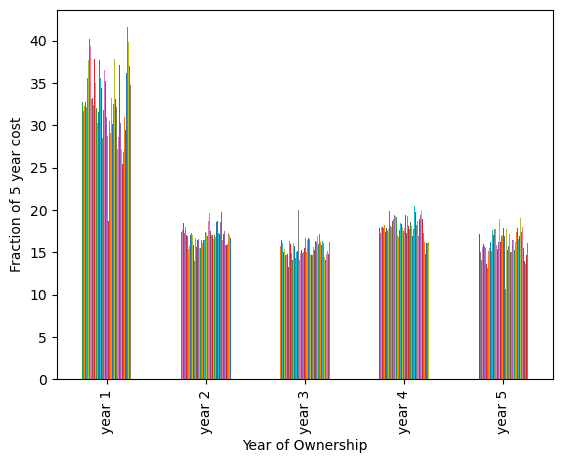

In [10]:
ice_yearly_fraction=pd.DataFrame(columns=['a'])
for i in range(5):
    text='year '+str(i+1)
    ice_yearly_fraction[text]=ice_yearly_cost_df[text]/ice_yearly_cost_df['five_year_cost']*100
del ice_yearly_fraction['a']
ice_yearly_fraction
ice_ratio_plot=ice_yearly_fraction.T.plot(kind='bar',legend=False,align="center")
ice_ratio_plot.set_xlabel("Year of Ownership")
ice_ratio_plot.set_ylabel("Fraction of 5 year cost")

In [11]:
ice_yearly_cost_df['year 1'].sort_values(ascending=False)

model                                                                                      engine              cost  
BMW 8 Series M850i xDrive 2dr Coupe AWD                                                    4.4L 8cyl Turbo 8A  106252    50450
Dodge  Challenger SRT Hellcat Widebody Jailbreak SRT Hellcat Widebody Jailbreak 2dr Coupe  6.2L 8cyl S/C 8A    99631     46816
Dodge Challenger SRT Hellcat Redeye Jailbreak 2dr Coupe w/Prod. End 04/23                  6.2L 8cyl S/C 8A    106012    46568
BMW M3 Competition xDrive 4dr Sedan AWD                                                    3.0L 6cyl Turbo 8A  94147     45555
Cadillac Escalade ESV Sport 4dr SUV                                                        6.2L 8cyl 10A       112889    44447
                                                                                                                         ...  
Chevrolet Camaro 2LT 2dr Coupe                                                             2.0L 4cyl Turbo 6M  35861    

<Axes: >

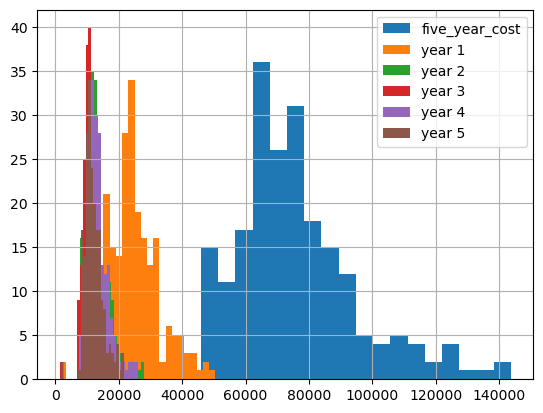

In [12]:
#disbrituion of cost in 1st year
ice_yearly_cost_df['five_year_cost'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 1'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 2'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 3'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 4'].hist(bins = 25,legend=True)
ice_yearly_cost_df['year 5'].hist(bins = 25,legend=True)

In [24]:
print("The average total cost to own a new car for the first five years.")
display(f"1 year mean = ${round(ice_yearly_cost_df['year 1'].mean(),2)}")
display(f"2 year mean = ${round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']).mean(),2)}")
display((f"3 year mean = $"
         f"{round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']+ice_yearly_cost_df['year 3']).mean(),2)}"))
display(f"4 year mean = ${round((ice_yearly_cost_df['year 1']+ice_yearly_cost_df['year 2']+ice_yearly_cost_df['year 3'] +ice_yearly_cost_df['year 4']).mean(),2)}")
display(f"5 year mean = ${round(ice_yearly_cost_df['five_year_cost'].mean(),2)}")

The average total cost to own a new car for the first five years.


'1 year mean = $25343.88'

'2 year mean = $38214.65'

'3 year mean = $49741.24'

'4 year mean = $63268.05'

'5 year mean = $75341.24'

In [14]:
display(ice_df["cost"].max())
display(ice_df["cost"].min())
display(ice_df["cost"].mean())

112889

31333

55811.830842391304